# <font color='orange'> <center> LAB 4 <br> Logistic Regression for Classification

## <font color='orange'> PART A: Prerequisite for Linear Regression implementation

### <font color='orange'> 1. Plot the attached dataset data1.csv using scatter plot. There is a target feature with discrete values 0,1. If the target feature is 1, the samples should be shown as red circle. If the target feature is 0, the samples should be shown as green x.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import fmin_tnc
import scipy.optimize as op

from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
plt.style.use("Solarize_Light2")
import random
np.random.seed(9)
np.set_printoptions(suppress=True)
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data1 = pd.read_csv("data1.csv")
df_data1

,x1,x2,y
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1
...,...,...,...
95,5.9868,7.3641,0
96,4.6711,6.2592,0
97,7.5810,8.3703,0
98,4.6457,8.5676,0


In [3]:
x1 = df_data1['x1']
x2 = df_data1['x2']
y = df_data1[['y']]
col = np.where(y == 1,'r','b')
col = [i[0] for i in col]

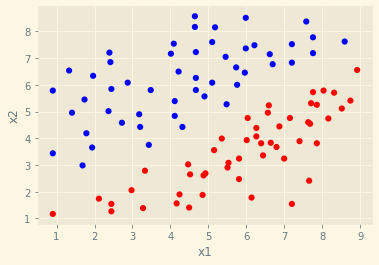

In [4]:
plt.scatter(x1, x2, c=col, s=10, linewidth=3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### <font color='orange'> 2. Plot a line y=(2x+3)

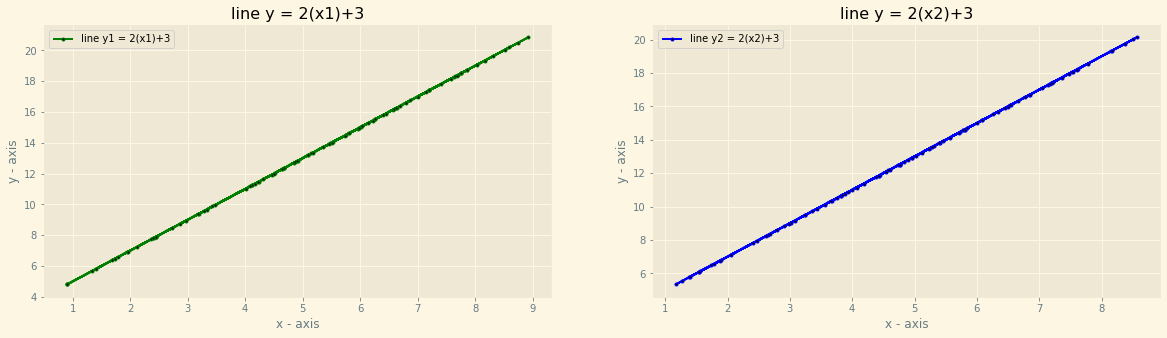

In [5]:
y1 = [(2*i+3) for i in list(x1)]
y2 = [(2*i+3) for i in list(x2)]
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplot(1, 2, 1)
plt.plot(x1, y1, color='green', label = "line y1 = 2(x1)+3", marker='o', markerfacecolor='black', markersize=3)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('line y = 2(x1)+3')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x2, y2, color='blue', label = "line y2 = 2(x2)+3", marker='o', markerfacecolor='black', markersize=3)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('line y = 2(x2)+3')
plt.legend()

### <font color='orange'> 3. Define a function sigmoid(z) that takes one parameter z and computes 1/(1+e^-z). Create a vector V with 10 values randomly in the range [-1000,1000]. Transform V to V' that consists of respective sigmoid values using the defined function. Observe the range of output values in V'.

In [6]:
def sigmoid(z): # Activation function used to map any real value between 0 and 1
    return (1 / (1 + np.exp(-z)))

In [7]:
v = [round(random.uniform(-1000, 1000)) for i in range(10)]
v_ = [sigmoid(z) for z in v]
print(v)
print(v_)

[-372, -751, -676, -667, -84, -543, 68, -411, 667, 415]
[2.769827558563886e-162, 0.0, 2.6117417612840555e-294, 2.1163162688838258e-290, 3.305700626760734e-37, 1.5069412687587628e-236, 1.0, 3.198658956689277e-179, 1.0, 1.0]


### <font color='orange'> 4. Define a function hypothesis(theta, X) that takes two vectors as parameters, theta and X. If sigmoid(theta.X) >= 0.5, output 0 else output 1.

In [8]:
def hypothesis(theta, x): #probability
    s = sigmoid(np.dot(x, theta)) # Computes sigmoid of the weighted sum of inputs
    return 0 if(s >= 0.5) else 1

### <font color='orange'> 5. Define a function cost(theta,X,y) to compute the error <br> Error = 1/m*Σ-yilog(hθ(xi)) - (1-yi)log(1-hθ (xi)) <br> Where xi is the ith sample and yi is the ith label, hθ(xi) is the hypothesis(theta,xi)

In [9]:
def cost_function(theta, x, y): # Computes the cost function
    m = x.shape[0]
    h = hypothesis(theta, x)
    sum = np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    total_cost = -(1 / m) * sum
    return total_cost

def gradient(theta, x, y): # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(np.dot(theta,x)) - y)

## <font color='orange'> PART B : Implementation of logistic regression

### <font color='orange'>  6. Implement gradient descent algorithm for logistic regression in data set loan_data.csv. <br> - read training dataset <br> - convert dataset to a feature matrix X <br> - normalizing feature matrix X <br> - stack columns with all ones in feature matrix <br> - target feature to be taken in a separate vector <br> - initial theta values <br> - gradient descent updation <br> - Display estimated theta values and number of iterations to converge <br> - Predict for test data

#### <font color='orange'> read training dataset

In [10]:
loan_data = pd.read_csv("loan_data.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
print("Column Name\tNull values")
print(loan_data.isnull().sum())

Column Name	Null values
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


#### <font color='orange'> Filling up null values

<AxesSubplot:>

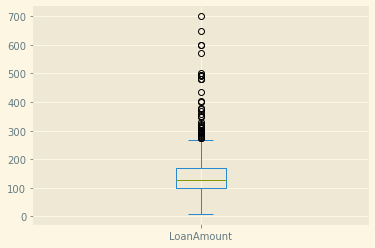

In [13]:
loan_data["LoanAmount"].plot(kind = 'box') #as LoanAmount is skewed, we will fill it with median

<AxesSubplot:>

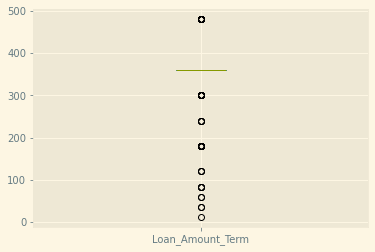

In [14]:
loan_data["Loan_Amount_Term"].plot(kind = 'box') #as Loan_Amount_Term is skewed, we will fill it with median

<AxesSubplot:>

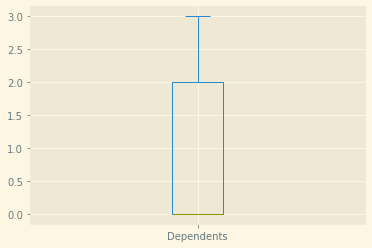

In [15]:
loan_data["Dependents"].replace("3+","3" , inplace = True)
loan_data["Dependents"] = pd.to_numeric(loan_data["Dependents"], errors='coerce')
loan_data["Dependents"].plot(kind = 'box') #as Dependents is skewed, we will fill it with median

In [16]:
loan_data["Dependents"].unique()

array([ 0.,  1.,  2.,  3., nan])

In [17]:
loan_data["LoanAmount"].fillna(loan_data['LoanAmount'].median(), inplace = True)
loan_data["Loan_Amount_Term"].fillna(loan_data['LoanAmount'].median(), inplace = True)
loan_data["Dependents"].fillna(loan_data['Dependents'].median(), inplace = True)
loan_data["Dependents"] = loan_data["Dependents"].astype('Int64')

In [18]:
#Other columns are categorical data, so we will fill up null values with mode
loan_data["Gender"].fillna("No Gender", inplace = True)
loan_data["Married"].fillna(loan_data['Married'].mode()[0], inplace = True)
loan_data["Dependents"].fillna(loan_data['Dependents'].mode()[0], inplace = True)
loan_data["Self_Employed"].fillna(loan_data['Self_Employed'].mode()[0], inplace = True)
loan_data["Credit_History"].fillna(loan_data['Credit_History'].mode()[0], inplace = True)

In [19]:
print("Column Name\tNull values")
print(loan_data.isnull().sum())

Column Name	Null values
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [20]:
categorical_columns = ["Gender", "Married", "Education", "Self_Employed", "Credit_History", "Property_Area"]
y_categorical_columns = ["Loan_Status"]
numerical_columns = ["Dependents", "LoanAmount", "Loan_Amount_Term", "ApplicantIncome", "CoapplicantIncome"]
for col in categorical_columns:
    print(col, "\t\t", list(loan_data[col].unique()))

Gender 		 ['Male', 'Female', 'No Gender']
Married 		 ['No', 'Yes']
Education 		 ['Graduate', 'Not Graduate']
Self_Employed 		 ['No', 'Yes']
Credit_History 		 [1.0, 0.0]
Property_Area 		 ['Urban', 'Rural', 'Semiurban']


In [21]:
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].astype('Int64')
loan_data["Credit_History"] = loan_data["Credit_History"].astype('str')
loan_data["Loan_Status"]= loan_data["Loan_Status"].astype('category')
loan_data["Loan_Status"] = loan_data["Loan_Status"].cat.codes
loan_data["Loan_Status"] = loan_data["Loan_Status"].astype('Int64')
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    Int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    Int64  
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    Int64  
dtypes: Int64(3), float64(2), int64(1), object(7)
memory usage: 64.3+ KB


In [22]:
loan_data_new = pd.concat([pd.get_dummies(loan_data[categorical_columns]), loan_data[numerical_columns], loan_data["Loan_Status"]], axis=1)
for col_name in loan_data_new.columns:
    if(loan_data_new[col_name].dtype == 'object'):
        loan_data_new[col_name] = loan_data_new[col_name].astype('Int64')
loan_data_new

,Gender_Female,Gender_Male,Gender_No Gender,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,Loan_Status
0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,128.0,360,5849,0.0,1
1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,128.0,360,4583,1508.0,0
2,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,66.0,360,3000,0.0,1
3,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,120.0,360,2583,2358.0,1
4,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,141.0,360,6000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,71.0,360,2900,0.0,1
610,0,1,0,0,1,1,0,1,0,0,1,1,0,0,3,40.0,180,4106,0.0,1
611,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,253.0,360,8072,240.0,1
612,0,1,0,0,1,1,0,1,0,0,1,0,0,1,2,187.0,360,7583,0.0,1


In [23]:
loan_data_new.to_csv("loan_data_new.csv")

In [24]:
loan_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            614 non-null    uint8  
 1   Gender_Male              614 non-null    uint8  
 2   Gender_No Gender         614 non-null    uint8  
 3   Married_No               614 non-null    uint8  
 4   Married_Yes              614 non-null    uint8  
 5   Education_Graduate       614 non-null    uint8  
 6   Education_Not Graduate   614 non-null    uint8  
 7   Self_Employed_No         614 non-null    uint8  
 8   Self_Employed_Yes        614 non-null    uint8  
 9   Credit_History_0.0       614 non-null    uint8  
 10  Credit_History_1.0       614 non-null    uint8  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Dependents               6

#### <font color='orange'> convert dataset to a feature matrix X

In [25]:
X = loan_data_new.drop("Loan_Status", 1)
X.columns

Index(['Gender_Female', 'Gender_Male', 'Gender_No Gender', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents', 'LoanAmount', 'Loan_Amount_Term',
       'ApplicantIncome', 'CoapplicantIncome'],
      dtype='object')

In [26]:
y = loan_data_new.iloc[:, -1].to_numpy()

#### <font color='orange'> normalizing feature matrix X

In [27]:
def normalize(X):
    max_value = X.max()
    min_value = X.min()
    sub_value = max_value - min_value
    if(sub_value == 0):
        return 0
    return np.divide(np.subtract(X,min_value),sub_value)

In [28]:
categorical_columns = list(set(loan_data_new.columns) - set(numerical_columns) - set(["Loan_Status"]))
print(categorical_columns)

['Credit_History_0.0', 'Married_Yes', 'Property_Area_Urban', 'Self_Employed_No', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Credit_History_1.0', 'Gender_Male', 'Gender_No Gender', 'Married_No', 'Education_Not Graduate', 'Gender_Female', 'Self_Employed_Yes', 'Education_Graduate']


In [29]:
for col in numerical_columns:
    X[col] = normalize(X[col])

In [30]:
X

,Gender_Female,Gender_Male,Gender_No Gender,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome
0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0.0,0.172214,0.74359,0.070489,0.000000
1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0.333333,0.172214,0.74359,0.054830,0.036192
2,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0.0,0.082489,0.74359,0.035250,0.000000
3,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0.0,0.160637,0.74359,0.030093,0.056592
4,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0.0,0.191027,0.74359,0.072356,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0.0,0.089725,0.74359,0.034014,0.000000
610,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1.0,0.044863,0.358974,0.048930,0.000000
611,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0.333333,0.353111,0.74359,0.097984,0.005760
612,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0.666667,0.257598,0.74359,0.091936,0.000000


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            614 non-null    uint8  
 1   Gender_Male              614 non-null    uint8  
 2   Gender_No Gender         614 non-null    uint8  
 3   Married_No               614 non-null    uint8  
 4   Married_Yes              614 non-null    uint8  
 5   Education_Graduate       614 non-null    uint8  
 6   Education_Not Graduate   614 non-null    uint8  
 7   Self_Employed_No         614 non-null    uint8  
 8   Self_Employed_Yes        614 non-null    uint8  
 9   Credit_History_0.0       614 non-null    uint8  
 10  Credit_History_1.0       614 non-null    uint8  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Dependents               6

#### <font color='orange'> initial theta values

In [32]:
def transform_x_y(xx, yy):
    xx = np.c_[np.ones((xx.shape[0], 1)), xx]
    yy = yy[:, np.newaxis]
    m,n = np.shape(xx)
    one_vec = np.ones((m,1))
    xx = np.hstack((one_vec,xx))
    theta = np.zeros((n+1,1))
    return xx, yy, theta

In [33]:
old_X = X
old_Y = y
X, y, theta = transform_x_y(X, y)

#### <font color='orange'> gradient descent updation

In [34]:
def sigmoid(z): # Activation function used to map any real value between 0 and 1
    z = z.astype(float)
    return (1 / (1 + np.exp(-z)))

def net_input(theta, x): # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x): # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y): # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y): # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def gd_fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, approx_grad=True, args=(x, y.flatten()))
    return opt_weights[0]

In [35]:
parameters = gd_fit(X, y, theta)
parameters

array([ 0.34100623,  0.34100623,  0.04513421,  0.02795371, -0.19653694,
       -0.36982231,  0.13315994, -0.09021046, -0.44293368,  0.17794204,
        0.10799482, -2.73525094,  1.22465379, -0.87600508,  0.02020988,
       -0.68273099,  0.31420137, -0.41142908,  0.03601239,  0.02465119,
       -1.31709396])

In [36]:
def predict_gd(x, parameters):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy_gd(x, actual_classes, parameters, probab_threshold=0.5):
    predicted_classes = (predict_gd(x, parameters) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100, predicted_classes

In [37]:
gradient_descent_accuracy, y_pred = accuracy_gd(X, y.flatten(), parameters)
print("Accuracy using Gradient Descent = ", gradient_descent_accuracy, "%")

Accuracy using Gradient Descent =  81.27035830618892 %


In [38]:
## Training model using only train dataset and then predicting test dataset
gd_x_train, gd_x_test, gd_y_train, gd_y_test = train_test_split(old_X, old_Y, test_size=0.25, random_state=0)
gd_x_train,  gd_y_train, theta = transform_x_y(gd_x_train, gd_y_train)
gd_parameters = gd_fit(gd_x_train, gd_y_train, theta)
print(gd_parameters)
gd_x_test,  gd_y_test, theta = transform_x_y(gd_x_test, gd_y_test)
gradient_descent_accuracy_2, gd_y_pred = accuracy_gd(gd_x_test, gd_y_test.flatten(), gd_parameters)
print("Accuracy using Gradient Descent after spliting dataset= ", gradient_descent_accuracy_2, "%")

[ 0.46326678  0.46326678  0.1614313   0.24713049 -0.00123595 -0.1618432
  0.21285939  0.21346804 -0.34375405  0.31391866  0.3488988  -3.01717933
  0.79627855 -0.50348196  0.25558749 -0.3055587   0.2327919  -1.60039451
 -1.05512565  0.65278647 -0.73130014]
Accuracy using Gradient Descent after spliting dataset=  83.11688311688312 %


              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



<AxesSubplot:>

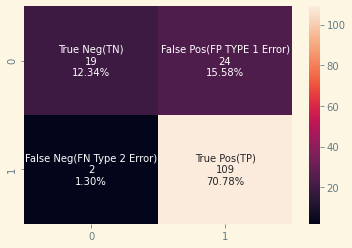

In [39]:
gd_y_test = list(gd_y_test.flatten())
gd_y_pred = list(gd_y_pred)
print(classification_report(gd_y_test,gd_y_pred))
gd_cf_matrix = metrics.confusion_matrix(gd_y_test, gd_y_pred)
group_names = ['True Neg(TN)', 'False Pos(FP TYPE 1 Error)', 'False Neg(FN Type 2 Error)', 'True Pos(TP)']
group_counts = ["{0:0.0f}".format(value) for value in gd_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in gd_cf_matrix.flatten()/np.sum(gd_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(gd_cf_matrix, annot=labels, fmt='')

### <font color='orange'> 7. Use sklearn built in function to find the model

In [40]:
X = old_X
y = loan_data_new.iloc[:, -1]
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
logreg = LogisticRegression(max_iter = 10000,random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

## <font color='orange'> PART C: Performance Evaluation of the classifier

In [42]:
parameters = logreg.coef_
print(parameters)

[[ 0.05805059  0.11849528 -0.17657126 -0.11954451  0.11951912  0.2417897
  -0.24181508  0.01133601 -0.0113614  -1.74853687  1.74851148 -0.31793508
   0.4163814  -0.09847171  0.26373488 -0.45327155 -0.34102166  0.24611225
  -0.87090286]]


### <font color='orange'> 8. Compute confusion matrix.

<AxesSubplot:>

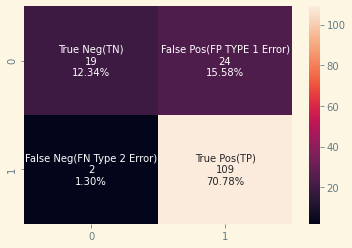

In [43]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg(TN)', 'False Pos(FP TYPE 1 Error)', 'False Neg(FN Type 2 Error)', 'True Pos(TP)']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt='')

### <font color='orange'> 9. Compute the accuracy score.

In [44]:
print("Accuracy using sklearn LogisticRegression()= ", logreg.score(x_test, y_test)*100, "%")

Accuracy using sklearn LogisticRegression()=  83.11688311688312 %


### <font color='orange'> 10. Print a classification report using the following sklearn function

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### <font color='orange'> 11. Plot ROC curve for loan status

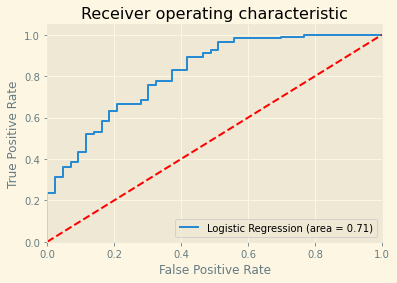

In [46]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### <font color='orange'> 12. Compare the performance of classifiers obtained in 6 and 7

In [47]:
print("Accuracy using Gradient Descent = ", gradient_descent_accuracy_2, "%")
print("Accuracy using sklearn LogisticRegression()= ", logreg.score(x_test, y_test)*100, "%")

Accuracy using Gradient Descent =  83.11688311688312 %
Accuracy using sklearn LogisticRegression()=  83.11688311688312 %


### <font color='orange'> Accuracy of Gradient Descent Logistic Regression is slightly better than sklearn LogisticRegression() <br> Even precision, recall and f1-score are better in Gradient Descent Logistic Regression than sklearn LogisticRegression()